Quick introduction to look for how to look at the data and what the first task will require. 

SDSS J114404.76+052951.77 is a white dwarf. https://ui.adsabs.harvard.edu/abs/2015ApJ...810L..17G/abstract suggested that it had a gas disc around it due to emission from Calcium. We found that the emission is actually due to an orbiting companion, probably a brown dwarf. Your task is to measure the orbital period of the system.  

Some reading material on similar systems here https://ui.adsabs.harvard.edu/public-libraries/qIO0Ze9fQzGnpI49Ywtv4A.

In [95]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

All the data is stored at https://drive.google.com/file/d/1oBTIDOO8RFGK-7PjQYD7ra7LNFpFRC-S/view. Download it, and set path below to wherever you put it:

In [2]:
#where you keep the data
path = '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/' #note the / on the end

First let's look at what we have in path.

In [3]:
os.listdir(path)

['UVB', 'VIS_notell', 'NIR', 'VIS']

What we have here is the three arms of Xshooter https://www.eso.org/sci/facilities/paranal/instruments/xshooter/overview.html, plus 'VIS_notell', which is the VIS arm with absorption from the atmosphere (mostly) removed. It's this one you'll be doing most of the work on at first. For convenince, let's make a path to it.

In [4]:
vispath = path + 'VIS_notell/'
vispath

'/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/'

In [5]:
#os.listdir(vispath)

There are 33 observations, each with a fits and csv file. The csv files contain just columns of wavelength, flux and flux uncertianty, and are much easier to work with. The fits files have more information that you'll need later, such as the timing of the observation. Let's have a look at one of the spectra.

In [6]:
sp = glob.glob(vispath+'*TAC.csv') #makes an array containing the path to all csv files. Note the TAC as I didn't want to include the merged spectrum
s = sp[3] #first one to have strong lines
print(s)
sp

/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_16_TAC.csv


['/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_30_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_21_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_2_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_16_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_14_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_8_TAC.csv',
 '/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_27_TAC.csv',
 '/home/david/work/114

In [7]:
#w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
w, f, e = np.loadtxt('spectra/SDSSJ1144_old/SDSS1144_2_SCI_SLIT_FLUX_MERGE1D_VIS_TAC.csv', unpack=True, delimiter=',') #feb 2018
#w, f, e = np.loadtxt('/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_0_TAC.csv', unpack=True, delimiter=',')

(1e-17, 5e-16)

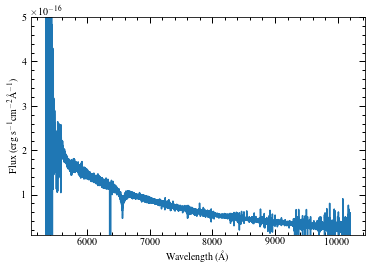

In [8]:
plt.step(w, f)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.ylim(0.1e-16, 5e-16)

There are two areas of interest in the spectrum. The first is the 8600A Calcium ii triplet:

(1e-17, 2e-16)

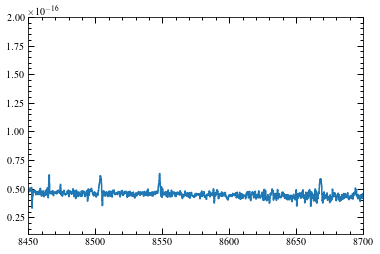

In [9]:
plt.step(w,f)
plt.xlim(8450, 8700)
plt.ylim(0.1e-16, 2e-16)

Now let's compare them with another spectrum a bit later:

In [10]:
#i = 0
#for s in [sp[3], sp[5]]:
#    w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
#    plt.step(w,f+i)
#    i += 0.5e-16 #this is just to offset the 2nd spectrum so we can see it
#plt.xlim(8450, 8700)
#plt.ylim(0.1e-16, 2e-16)

The lines have moved between the observations. The lines are in fact emmision from a companion star. Your first task will be to fit Gaussian's to the lines using astropy fitting routines (http://docs.astropy.org/en/stable/modeling/). You can then look up where they should be from the NIST database (https://physics.nist.gov/PhysRefData/ASD/lines_form.html) and measure the doppler velocity for each spectrum.  

The other part of the spectrum to look at is the H alpha line:

(5e-17, 2.3e-16)

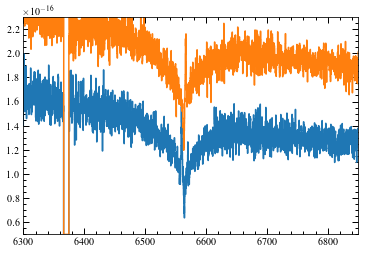

In [11]:
i = 0
for s in [sp[3], sp[5]]:
    w, f, e = np.loadtxt(s, unpack=True, delimiter=',')
    plt.step(w,f+i)
    i += 0.5e-16 #this is just to offset the 2nd spectrum so we can see it
plt.xlim(6300, 6850)
plt.ylim(0.5e-16, 2.3e-16)

Here we see absorption from the white dwarf moving in antiphase to emission from the companion. This gives us the opportunity to measure the velocites of both components, and hence their mass ratio.

20190613 Trying to fit continuum using astropy.

(1e-17, 1.4e-16)

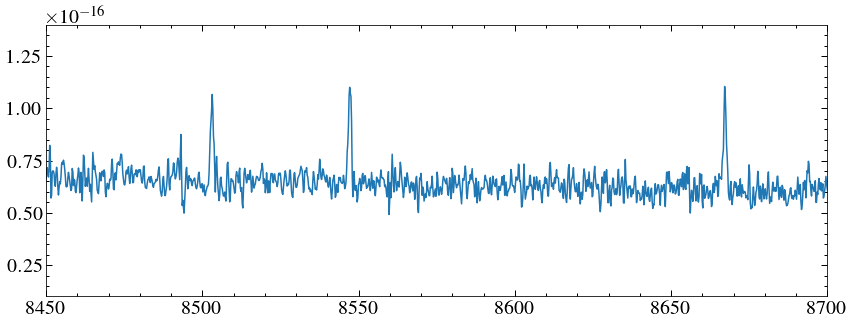

In [72]:
plt.plot(w, f)
plt.xlim(8450, 8700)
plt.ylim(0.1e-16, 1.4e-16)

In [73]:
mask = (w > 8450) & (w < 8480) | (w > 8520) & (w <8540) | (w > 8560) & (w< 8660) | (w > 8680) & (w < 8700) #mask out emmission lines

In [74]:
w1, f1 = w[mask], f[mask]

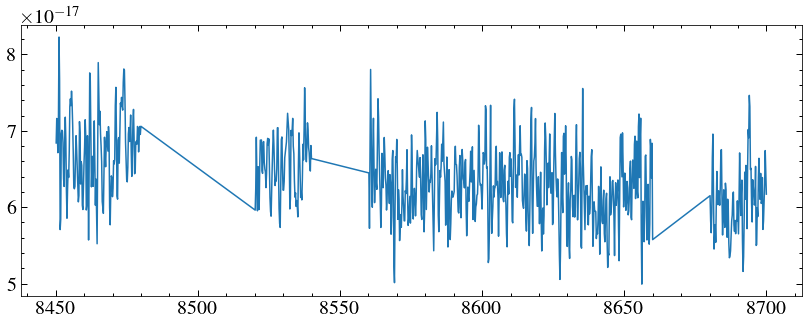

In [75]:
plt.plot(w1, f1)

In [76]:
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()

In [77]:
n_init = models.Polynomial1D(3)

In [78]:
n_fit = fitter(n_init, w1, f1)

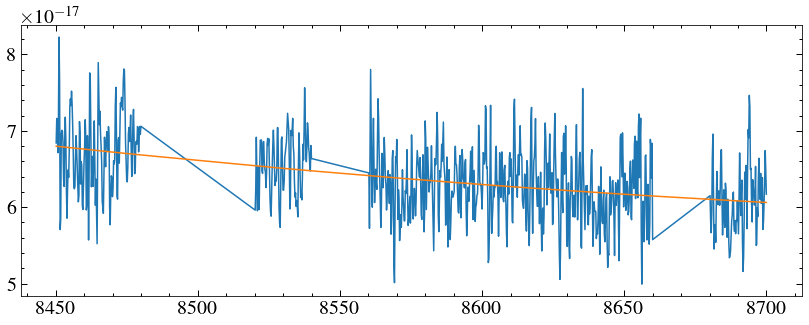

In [79]:
plt.plot(w1, f1)
plt.plot(w1, n_fit(w1))

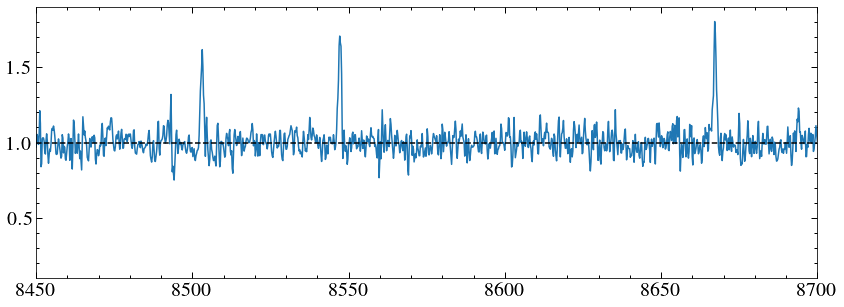

In [80]:
plt.plot(w, f/n_fit(w)) #f/n_fit(w) = normalised flux, at least for this wavelength range
plt.xlim(8450, 8700)
plt.ylim(0.1, 1.9)
plt.axhline(1.0, c='k', ls ='--')

In [81]:
lines = [8498.02,8542.09,8662.14]

In [82]:
mask = (w > 8450) & (w < 8700)

In [83]:
w1, f1 = w[mask], f[mask]
nf = f1/n_fit(w1)
nf = convolve(nf,Box1DKernel(6))

Model: CompoundModel40
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Const1D(amplitude=1.)>

    [1]: <Gaussian1D(amplitude=1., mean=8503.02, stddev=1.)>

    [2]: <Gaussian1D(amplitude=1., mean=8547.09, stddev=1.)>

    [3]: <Gaussian1D(amplitude=1., mean=8667.14, stddev=1.)>
Parameters:
       amplitude_0         amplitude_1     ...     mean_3          stddev_3     
    ------------------ ------------------- ... -------------- ------------------
    0.9941891902589387 0.45906670167645847 ... 8667.128748365 0.6456533022878547


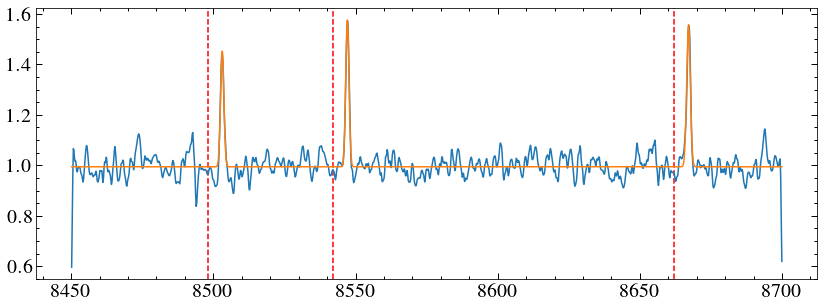

In [84]:
guess = +5
for i in range(len(lines)):
    line = lines[i]
    if i == 0:
        gg_init = models.Const1D(1.0)+models.Gaussian1D(1.0, line+guess,1.0)    
    else:
        gg_init = gg_init + models.Gaussian1D(1.0, line+guess, 1.0)
    plt.axvline(line, c='r', ls='--')
fitter = fitting.LevMarLSQFitter()
#fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, w1, nf)
#fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(gg_fit)
#print(fit_e)
plt.plot(w1, nf)
plt.plot(w1, gg_fit(w1))


In [85]:
means = np.array([gg_fit[i].mean.value for i in range(len(lines)+1)[1:]])

In [86]:
import astropy.constants as const
dvs = []
for mean, line in zip(means, lines):
    dv=const.c.value*((mean/line)-1)
    dvs.append(dv)

In [87]:
dv = np.mean(np.array(dvs)*1e-3)
dv_e = np.std(np.array(dvs)*1e-3)
print(dv, dv_e)

176.55761968327874 3.040094895395566


In [28]:
sp[5]

'/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_8_TAC.csv'

In [29]:
np.array(dvs)*1e-3

array([180.0754428 , 176.93925849, 172.65815776])

In [30]:
4000e3/const.c.value

0.013342563807926082

In [31]:
sp[14]

'/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_4_TAC.csv'

/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_20_TAC.csv


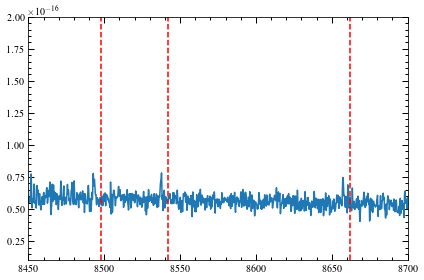

In [32]:
num = 19
w2, f2, e2 = np.loadtxt(sp[num], unpack=True, delimiter=',')
print(sp[num])
plt.plot(w2, f2)
plt.xlim(8450, 8700)
plt.ylim(0.1e-16, 2e-16)
[plt.axvline(line, c='r', ls='--') for line in lines]
plt.tight_layout()
plt.savefig('vis_20_lines.png')

In [33]:
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

In [34]:
fit_e

array([0.00125943, 0.0334029 , 0.05920075, 0.04197165, 0.0335229 ,
       0.04683744, 0.03304933, 0.03095204, 0.04827056, 0.03583842])

In [35]:
l_tab = np.genfromtxt('taurus/DopplerVelocitiesTABLE.csv', delimiter=',', dtype=None, names=True, encoding=None)

In [36]:
l_tab.dtype.names

('File_Number_spi',
 'First_Peak_Doppler_Velocity_kms',
 'Second_Peak_Doppler_Velocity_kms',
 'Third_Peak_Doppler_Velocity_kms',
 'Detection',
 'Time_MJD',
 'File_Path')

In [37]:
data = l_tab[l_tab['Detection'] =='Yes']

In [38]:
t = data['Time_MJD']
dvs =[]
es =[]
for d in data:
    dvs.append(np.mean([d[data.dtype.names[i]] for i in [1,2,3]])) 
    es.append(np.std([d[data.dtype.names[i]] for i in [1,2,3]])) 
dvs, es = np.array(dvs), np.array(es)

In [39]:
th = t -t[0]
th *=24

<ErrorbarContainer object of 3 artists>

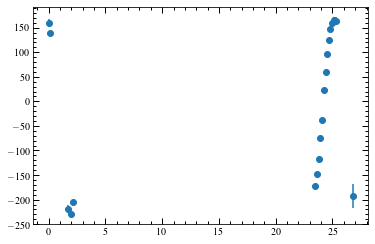

In [40]:
plt.errorbar(th, dvs, yerr=es, ls='none', marker='o')
#plt.xlim(22, 28)

In [41]:
from astropy.timeseries import LombScargle

In [42]:
#frequency, power = LombScargle(th, dvs, es).autopower(minimum_frequency =1/4.5, maximum_frequency = 1/3.8)
frequency = np.linspace(1/5, 1/3, 10000)
power = LombScargle(th, dvs, es, normalization='model').power(frequency)

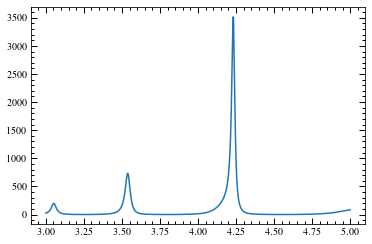

In [43]:
plt.plot(1/frequency, power)

In [44]:
period = 1/frequency[np.argmax(power)]
tf = th/4.23
tf %= 1

<ErrorbarContainer object of 3 artists>

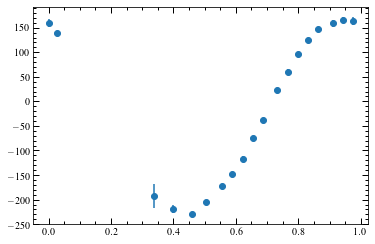

In [45]:
plt.errorbar(tf, dvs, yerr=es, ls='none', marker='o')


In [46]:
#wu, fu, eu = np.loadtxt('spectra/SDSSJ1144_old/SDSS1144_2_SCI_SLIT_FLUX_MERGE1D_UVB.csv', unpack=True, delimiter=',')
wu, fu, eu = np.loadtxt('/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/UVB/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_UVB_10.csv', unpack=True, delimiter=',')

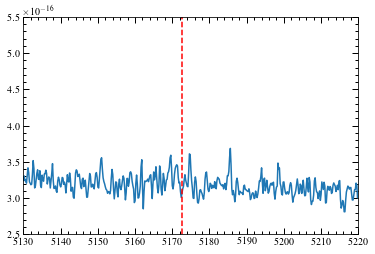

In [47]:
plt.plot(wu, fu)
plt.xlim(5130, 5220)
plt.ylim(2.5e-16, 5.5e-16)
plt.axvline(5172.6843, c='r', ls='--')
#plt.axvline(5172.6843+(8668.07169106186-8667.14), c='C1', ls='--')

Having a look at the NIR spectrum + photometry

In [48]:
wi, fi, ei = np.loadtxt(path+'NIR/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_NIR_merged.csv', unpack=True)

In [49]:
#fi_old = fi
fi = convolve(fi_old,Box1DKernel(15))

NameError: name 'fi_old' is not defined

In [ ]:
plt.plot(w,f)
plt.step(wi, fi, where='mid')
plt.xlim(9900, 10300)
plt.ylim(0, 1e-16)

We can trust that the flux is real? Maybe see if any of those lines move in individual spectra, if not remove them

In [ ]:
#plt.step(wi, fi, where='mid')
mask = (fi < 0.5e-16) & (fi >0)
fm = np.ma.array(fi, mask=~mask)
plt.step(wi, fm, where='mid')

In [ ]:
from astropy.table import Table
import astropy.units as u

photab = Table.read('1144_phot.txt', format='ascii')

#f_lamda = f_nu.to("erg/(s cm2 AA)", equivalencies=u.spectral_density(wavelength))

In [ ]:
photab

In [ ]:
w_phot = photab['nu(GHz)'] *u.GHz
f_nu = photab['fnu(Jy)'] *u.Jy
e_nu = photab['fnu_e(Jy)'] *u.Jy

In [ ]:
w_lam = w_phot.to(u.AA, equivalencies=u.spectral())
f_lam = f_nu.to("erg/(s cm2 AA)", equivalencies=u.spectral_density(w_lam))
e_lam = (e_nu/f_nu) * f_lam

In [ ]:
plt.errorbar(np.array(w_lam), np.array(f_lam), yerr=np.array(e_lam), ls='none', marker='o')

In [ ]:
plt.step(wi, fm, where='mid')
plt.errorbar(np.array(w_lam), np.array(f_lam), yerr=np.array(e_lam), ls='none', marker='o')
plt.xlim(wi[0], wi[-1])
plt.ylim(0, 5e-17)

Flux calibration actually fairly good!

Playing with freq_to_vel

In [ ]:
rest_lam, obs_lam  = 8500.0*u.AA, 8499.112345678*u.AA
dv = obs_lam.to(u.km/u.s,  equivalencies=u.doppler_optical(rest_lam))
print(dv)

(5e-17, 2.3e-16)

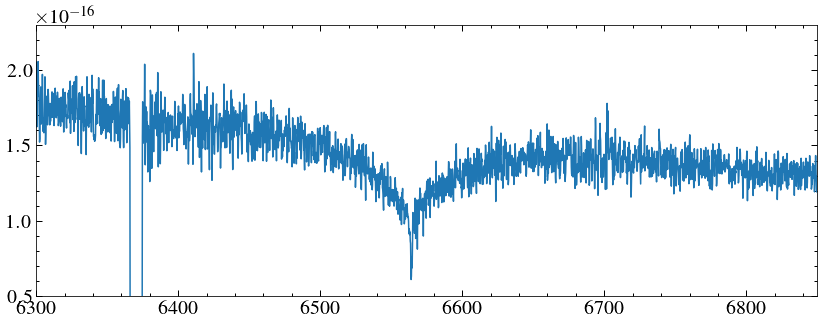

In [123]:
w, f, e = np.loadtxt('/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_24_TAC.csv', unpack=True, delimiter=',')
plt.plot(w,f)
plt.xlim(6300, 6850)
plt.ylim(0.5e-16, 2.3e-16)

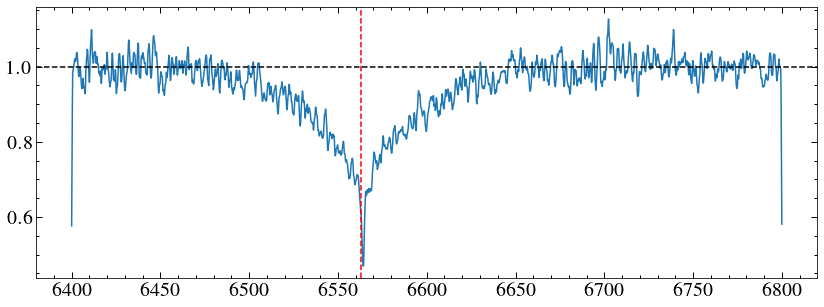

In [124]:
mask = (w>6400) & (w <6800 )
w1, f1 = w[mask], f[mask]
cmask =  (w1 <6450 ) | (w1>6650) 
#mask = (w > 6400)  & (w < 6450 ) | (w > 6650) & (w < 6800 )
n_fit = fitter(n_init, w1[cmask], f1[cmask])
nf = f1/n_fit(w1)
nf = convolve(nf,Box1DKernel(6))
plt.plot(w1, nf)
plt.axhline(1.0, c='k', ls='--')
halpha = 6562.77
plt.axvline(halpha, c='r', ls='--')

Parameter('mean_0', value=6563.373245712013) 2.0970007555821257
Parameter('mean_1', value=6563.373245712013, tied=<function tiedfunc at 0x7f2d9bb89d90>) 17.201799891261945
Parameter('mean_2', value=6563.373245712013, tied=<function tiedfunc at 0x7f2d9bb89d90>) 43.37816482383546


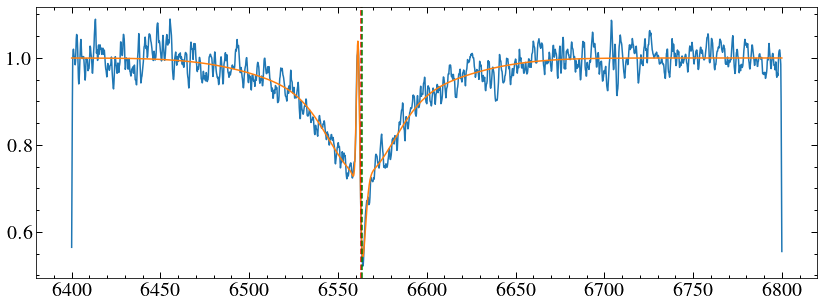

In [182]:
w, f, e = np.loadtxt('/home/david/work/1144_lt/spectra/nicola_2/WDJ114404.76+052951.77/VIS_notell/WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_14_TAC.csv', unpack=True, delimiter=',')
mask = (w>6400) & (w <6800 )
w1, f1 = w[mask], f[mask]
cmask =  (w1 <6450 ) | (w1>6650) 
n_fit = fitter(n_init, w1[cmask], f1[cmask])
nf = f1/n_fit(w1)
nf = convolve(nf,Box1DKernel(6))


def tiedfunc(ha_init):
    mean = ha_init.mean_0.value
    return mean
halpha = 6562.77

ha_init = models.Gaussian1D(-0.5, halpha,0.5)+ models.Gaussian1D(-0.3, halpha,1.0)+models.Gaussian1D(-0.2, halpha,30) + models.Const1D(1.0) +models.Gaussian1D(+1, halpha-2,1.)
ha_init.mean_1.tied=tiedfunc
ha_init.mean_2.tied=tiedfunc

#+models.Gaussian1D(0.5, halpha+guess2,1.0)
#ha_init = model1+  
ha_fit = fitter(ha_init, w1, nf, maxiter=100000)
#print(ha_fit)
plt.plot(w1, nf)
plt.plot(w1, ha_fit(w1))

print(ha_fit.mean_0, ha_fit.stddev_0.value)
print(ha_fit.mean_1, ha_fit.stddev_1.value)
print(ha_fit.mean_2, ha_fit.stddev_2.value)
#print(ha_fit.mean_3, ha_fit.stddev_3)
#print(ha_fit.mean_4, ha_fit.stddev_3)
plt.axvline(halpha, c='r', ls='--')
plt.axvline(ha_fit.mean_0, c='g', ls='--')
#plt.axvline(ha_fit.mean_1, c='m', ls='--')
#plt.axvline(ha_fit.mean_2, c='b', ls='--')
#plt.xlim(6500, 6600)
#print(model1[0].mean)

In [99]:
#dv.to(u.AA,  equivalencies=u.doppler_optical(rest_lam))
(ha_fit.mean_3.value*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(halpha*u.AA))

<Quantity 120.87072393 km / s>

In [100]:
dv

176.55761968327874

In [92]:
print(ha_fit)
ha_fit

Model: CompoundModel47
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Const1D(amplitude=1.)>

    [1]: <Gaussian1D(amplitude=-0.5, mean=6564.77, stddev=1.)>

    [2]: <Gaussian1D(amplitude=-0.2, mean=6564.77, stddev=50.)>

    [3]: <Gaussian1D(amplitude=0.5, mean=6565.77, stddev=1.)>

    [4]: <Gaussian1D(amplitude=-0.7, mean=6564.77, stddev=1.)>
Parameters:
       amplitude_0         amplitude_1     ...       mean_4           stddev_4     
    ------------------ ------------------- ... ----------------- ------------------
    0.9981910387079791 -0.1419198236411936 ... 6564.805040927364 1.3508330566527622


<CompoundModel47(amplitude_0=0.99819104, amplitude_1=-0.14191982, mean_1=6563.88373534, stddev_1=6.86897585, amplitude_2=-0.18290875, mean_2=6562.394786, stddev_2=33.61973912, amplitude_3=0.8662399, mean_3=6565.41598638, stddev_3=1.4647058, amplitude_4=-0.84884362, mean_4=6564.80504093, stddev_4=1.35083306)>

In [93]:
fitter.fit_info['param_cov']

array([[ 8.69010207e-07, -2.71634759e-07, -6.03988587e-06,
         5.27216409e-05,  1.73986087e-08, -4.72804660e-06,
         2.93704258e-04,  3.15852195e-04,  4.14724888e-05,
        -5.32937952e-05, -3.17933032e-04,  2.67554565e-04,
        -1.33228019e-05],
       [-2.71634759e-07,  1.55935752e-04, -1.43377957e-03,
         3.92903222e-03, -1.79794085e-06,  3.70693144e-04,
        -5.41922199e-04,  1.01250299e-01,  9.12271746e-03,
        -1.47713689e-02, -1.02817218e-01,  8.23840139e-02,
        -3.41321483e-03],
       [-6.03988587e-06, -1.43377957e-03,  1.15492249e-01,
        -4.10224485e-02, -1.15384543e-04, -4.01499443e-02,
        -1.55584028e-02, -6.81139286e-01,  1.25288559e-01,
        -2.78231245e-03,  7.34254650e-01, -4.03398968e-01,
        -1.66016485e-02],
       [ 5.27216409e-05,  3.92903222e-03, -4.10224485e-02,
         2.67344242e-01,  1.45418687e-03, -4.86072668e-03,
         1.62533436e-01,  3.13957168e+00,  3.67183870e-01,
        -5.04749353e-01, -3.16980212e

In [59]:
fitter.fit_info

{'nfev': 103,
 'fvec': array([0.42671677, 0.26088203, 0.09956004, ..., 0.05855847, 0.23256738,
        0.40452721]),
 'fjac': array([[-4.47213595e+01,  2.23606798e-02,  2.23606798e-02, ...,
          2.23606798e-02,  2.23606798e-02,  2.23606798e-02],
        [-8.59502722e+00,  1.40685518e+01,  1.33621620e-02, ...,
          1.33622247e-02,  1.33622247e-02,  1.33622247e-02],
        [-9.71966578e-01,  2.46818799e+00, -4.86822463e+00, ...,
          2.37611022e-03,  2.37611022e-03,  2.37611022e-03],
        ...,
        [ 3.99698137e-11,  2.13879445e-03, -2.51824594e-02, ...,
          3.04155022e-05,  3.04155022e-05,  3.04155022e-05],
        [ 1.74601864e-08,  8.50173542e-04,  3.98167146e-03, ...,
          3.42720785e-04,  3.42720785e-04,  3.42720785e-04],
        [ 5.79254047e-02, -2.97065696e-02, -2.55610294e-02, ...,
          1.19827036e-02,  1.19827036e-02,  1.19827036e-02]]),
 'ipvt': array([ 1,  5,  2,  8,  9, 10,  4,  3,  6,  7], dtype=int32),
 'qtf': array([-0.00053603,  0.00